# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [250]:
import os
import math
import scipy
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Saya memakai dataset yang disediakan dicoding pada link https://www.kaggle.com/datasets/datascientistanna/customers-dataset
yang terdiri dari kolom-kolom berikut:
- Customer ID
- Gender
- Age
- Annual Income
- Spending Score - Score assigned by the shop, based on customer - behavior and spending nature
- Profession
- Work Experience - in years
- Family Size

In [251]:
url = 'https://raw.githubusercontent.com/feverlash/Dicoding-Project-ML/refs/heads/main/Customers.csv'

df = pd.read_csv(url)
original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6



Inference: The Dataset consists of 8 features & 2000 samples.


In [252]:
df = df.rename(columns={'Annual Income ($)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [253]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       2000 non-null   int64 
 1   Gender           2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Annual Income    2000 non-null   int64 
 4   Spending Score   2000 non-null   int64 
 5   Profession       1965 non-null   object
 6   Work Experience  2000 non-null   int64 
 7   Family Size      2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [255]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score,Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [256]:
# mengecek data kosong
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Score,0
Profession,35
Work Experience,0
Family Size,0


Terdapat data yang kosong yaitu profesi, karena jumlah data sudah sedikit, maka saya tidak akan menghapus baris tersebut dan akan mengisinya dengan membandingkan rata-rata penghasilan pada baris yang kosong dengan rata-rata penghasilan dari setiap profesi yang ada.

In [257]:
df[df['Profession'].isnull()].describe()

,CustomerID,Age,Annual Income,Spending Score,Work Experience,Family Size
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1011.171429,52.628571,117233.828571,44.428571,4.657143,4.400000
std,528.974562,29.439955,40129.777321,24.924929,3.685766,2.032095
min,80.000000,0.000000,36000.000000,3.000000,0.000000,1.000000
25%,622.000000,26.500000,89422.000000,23.000000,1.000000,3.000000
50%,1010.000000,58.000000,121377.000000,42.000000,5.000000,4.000000
75%,1401.500000,75.000000,147630.000000,65.500000,7.000000,6.000000
max,1933.000000,99.000000,186655.000000,87.000000,12.000000,7.000000


In [258]:
df.groupby('Profession')['Annual Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Profession,,,,,,,,
Artist,612.0,108776.580065,45430.821575,0.0,73122.75,105211.0,146370.50,189709.0
Doctor,161.0,111573.217391,48261.233502,0.0,73892.00,111871.0,154821.00,189672.0
Engineer,179.0,111161.240223,46503.822115,7000.0,76260.50,112766.0,151230.00,189974.0
Entertainment,234.0,110650.333333,45001.884572,1000.0,73497.50,109446.0,148479.50,186882.0
Executive,153.0,113770.130719,45434.149328,4000.0,77873.00,112957.0,150782.00,189630.0
Healthcare,339.0,112574.041298,45426.143104,3000.0,76475.50,111717.0,151050.50,189689.0
Homemaker,60.0,108758.616667,40393.442633,29000.0,78213.25,100387.0,135993.75,188696.0
Lawyer,142.0,110995.838028,47793.706749,3000.0,74277.25,113338.5,150881.25,189650.0
Marketing,85.0,107994.211765,48772.573140,5000.0,65483.00,120899.0,145704.00,186069.0


Setiap profesi memiliki rata-rata penghasilan yang tidak jauh berbeda, maka saya akan mengisi profesi yang kosong berdasarkan penghasilan terkecil dan terbesar, yaitu Homemaker

In [259]:
df.Profession.fillna(value="Homemaker",inplace=True)

In [260]:
#Mengecek outlier

num_list=[i for i in df.select_dtypes(["int64","float64"])]
for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.15)
    Q3 = df[i].quantile(0.85)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

CustomerID no
Age no
Annual Income no
Spending Score no
Work Experience no
Family Size no


Tidak ada outlier

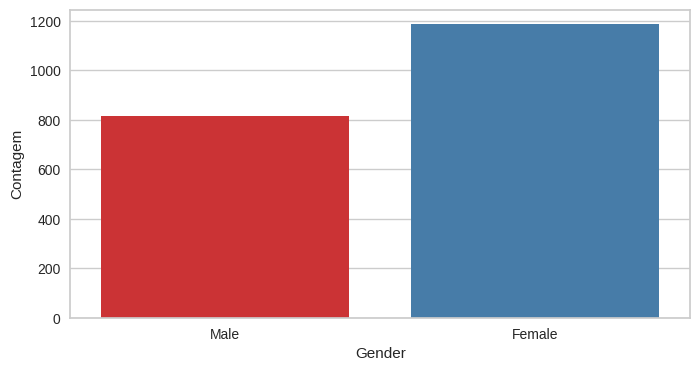

In [261]:
plt.figure(figsize=(8, 4))
g = sns.countplot(x='Gender', data=df, orient='h', palette='Set1')
g.set_ylabel('Contagem')

plt.show()

Text(0, 0.5, 'Count')

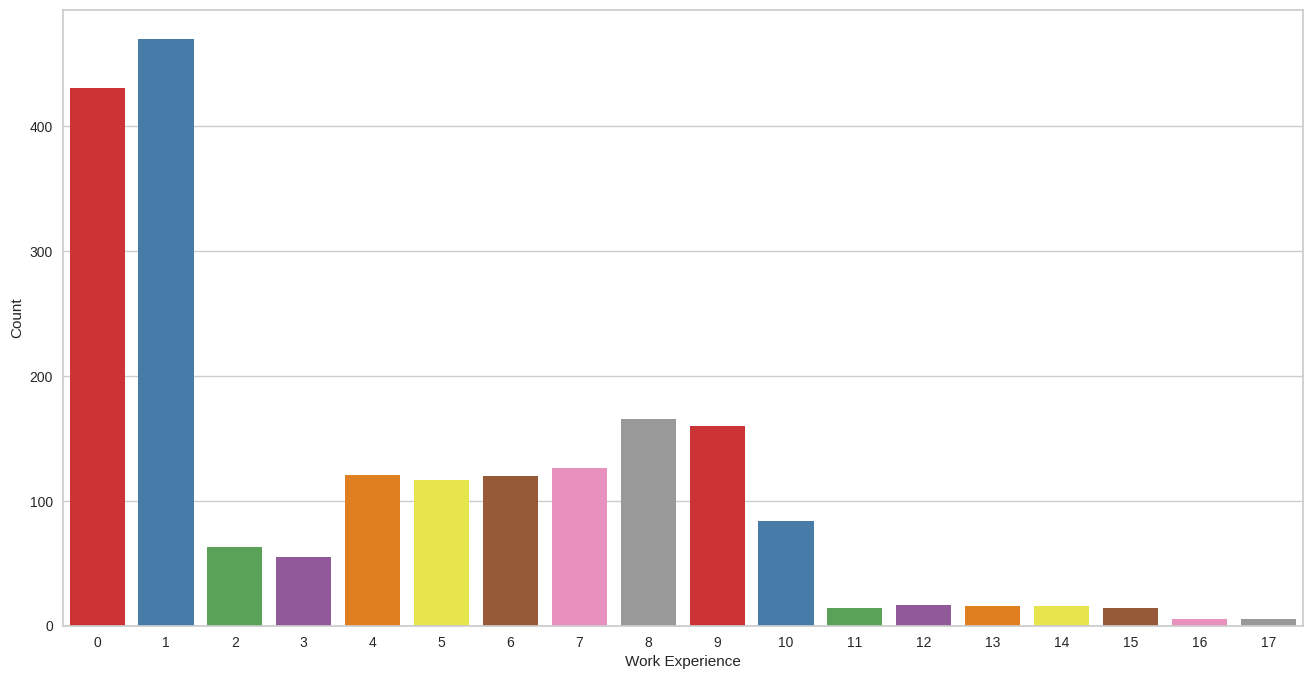

In [262]:
plt.figure(figsize = (16, 8))
g = sns.countplot(x = 'Work Experience', data = df, orient = 'h', palette='Set1')
g.set_ylabel('Count')

Text(0, 0.5, 'Count')

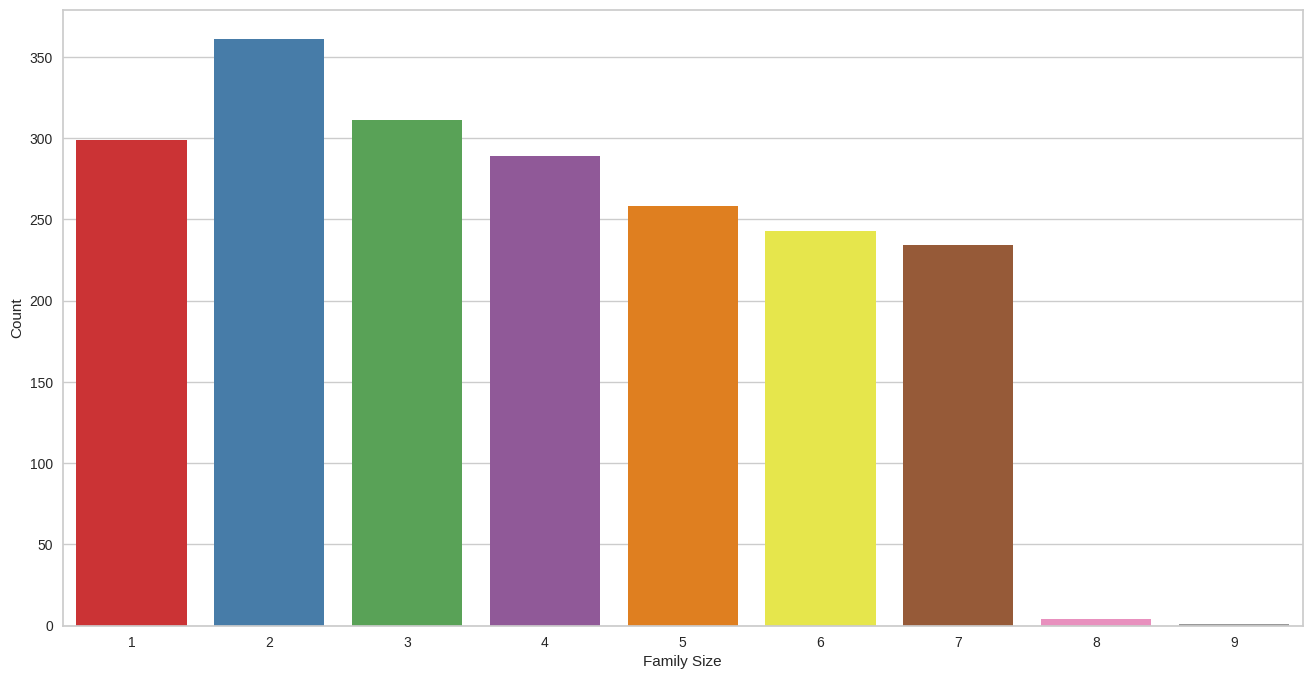

In [263]:
plt.figure(figsize = (16, 8))
g = sns.countplot(x = 'Family Size', data = df, orient = 'h', palette='Set1')
g.set_ylabel('Count')

Text(0, 0.5, 'Count')

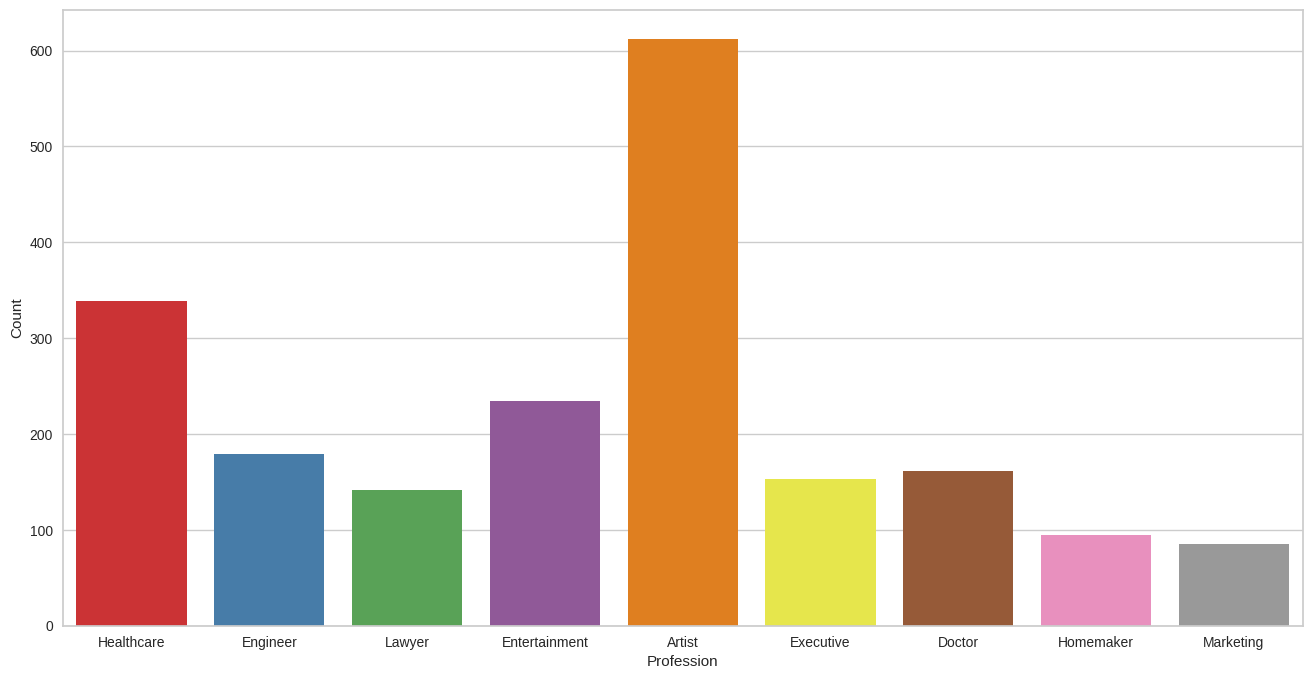

In [264]:
plt.figure(figsize = (16, 8))
g = sns.countplot(x = 'Profession', data = df, orient = 'h', palette='Set1')
g.set_ylabel('Count')

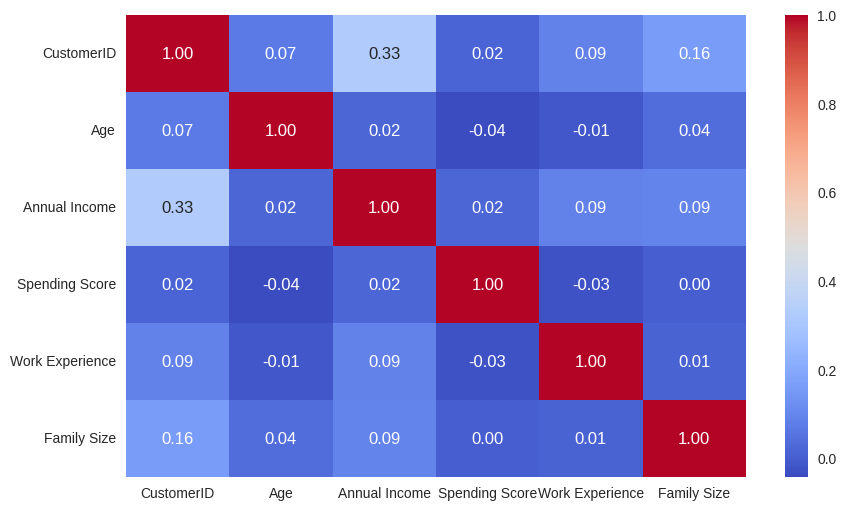

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Melakukan binning pada kolom dataset serta membuat fitur baru

In [266]:
# binning Umur
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, float('inf')],
                         labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

# menghitung income permember
df['IncomePerMember'] = df['Annual Income'] / df['Family Size']

# binning spending score
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
df['SpendingScoreCategory'] = pd.cut(df['Spending Score'], bins=bins, labels=labels, right=False)

# binning experience
bins = [0, 5, 10, 15, 20]
labels = ['Entry', 'Mid', 'Senior', 'Expert']
df['ExperienceLevel'] = pd.cut(df['Work Experience'], bins=bins, labels=labels, right=False)

# fitur rasio spending score dengan annual income
df['Income_Experience_Ratio'] = df['Annual Income'] / (1 + df['Spending Score'])

# binning ukuran keluarga
bins_family = [0, 3, 5, float('inf')]
labels_family = ['Small', 'Medium', 'Large']
df['FamilySizeCategory'] = pd.cut(df['Family Size'], bins=bins_family, labels=labels_family, right=False)

In [267]:
#Encoding data kategorikal
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])

In [268]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])
df['Age Group'] = le.fit_transform(df['Age Group'])
df['SpendingScoreCategory'] = le.fit_transform(df['SpendingScoreCategory'])
df['ExperienceLevel'] = le.fit_transform(df['ExperienceLevel'])
df['FamilySizeCategory'] = le.fit_transform(df['FamilySizeCategory'])

In [269]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,Age Group,IncomePerMember,SpendingScoreCategory,ExperienceLevel,Income_Experience_Ratio,FamilySizeCategory
0,1,1,19,15000,39,5,1,4,0,3750.000000,1,0,375.000000,1
1,2,1,21,35000,81,2,3,3,1,11666.666667,3,0,426.829268,1
2,3,0,20,86000,6,2,1,1,0,86000.000000,4,0,12285.714286,2
3,4,0,23,59000,77,7,0,2,1,29500.000000,0,0,756.410256,2
4,5,0,31,38000,40,3,2,6,2,6333.333333,2,0,926.829268,0


In [270]:
# Standardizing numerical variables
numerical_cols = ['Annual Income', 'Work Experience', 'Family Size', 'IncomePerMember', 'Spending Score']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])

In [271]:
#Memilih fitur dan melakukan copy kepada dataset yang belum ditambahkan kolom baru
features = df_normalized.drop(['CustomerID'], axis=1)
df_copy = df.drop(['Age Group', 'IncomePerMember', 'SpendingScoreCategory', 'ExperienceLevel',	'Income_Experience_Ratio',	'FamilySizeCategory'], axis=1)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [272]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

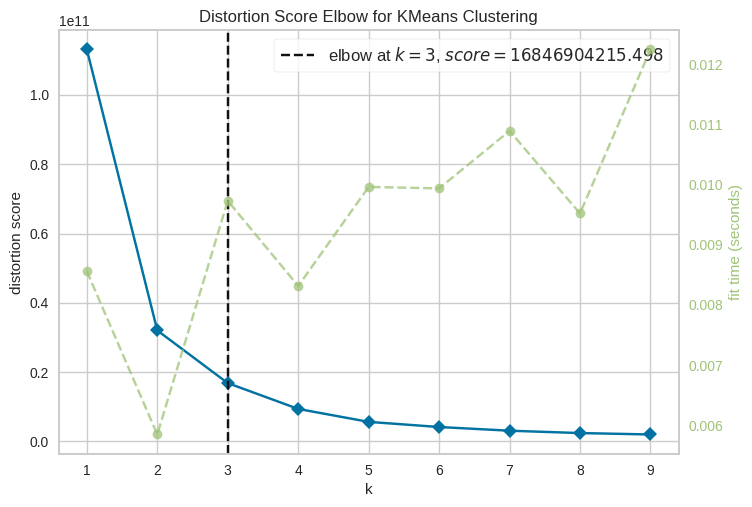

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [273]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(features)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [274]:
model = KMeans(3)
model.fit(features)
pred = model.predict(features)
score = silhouette_score(features, pred)
print(f'Silhouette Score for k = {3}: {score:.3f}')

Silhouette Score for k = 3: 0.785


dipilih clustering dengan 3 cluster

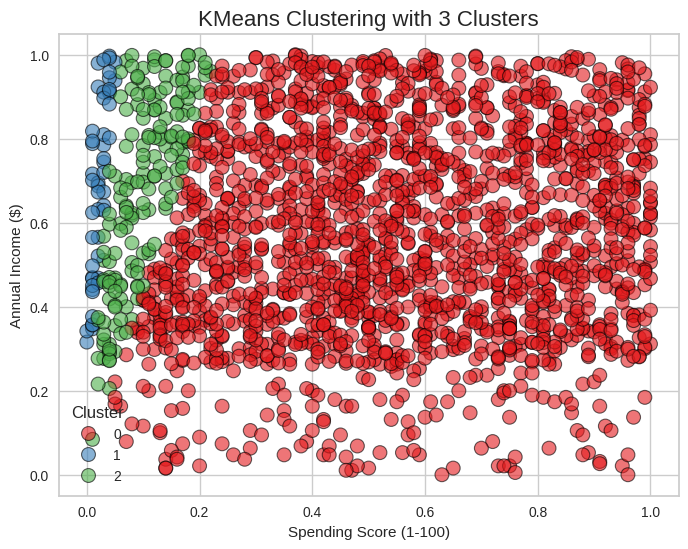

In [275]:
#menggunakan KMeans dengan k=3
k = 3
model = KMeans(n_clusters=k)
model.fit(features)

pred = model.predict(features)

features['Cluster'] = pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=features['Spending Score'], y=features['Annual Income'], hue=features['Cluster'], palette='Set1', s=100, alpha=0.6, edgecolor='black')

plt.title(f"KMeans Clustering with {k} Clusters", fontsize=16)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income ($)')
plt.legend(title='Cluster')

plt.show()

berdasarkan visualisasi di atas, diperoleh cluster tidak tersebar dengan merata. Akan dilakukan *feature selection* untuk memperoleh hasil yang lebih baik

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [276]:
selected_features = ['Annual Income', 'Spending Score']
df_selected = df_normalized[selected_features]

df_selected.head()

,Annual Income,Spending Score
0,0.078958,0.39
1,0.184236,0.81
2,0.452694,0.06
3,0.310569,0.77
4,0.200027,0.40


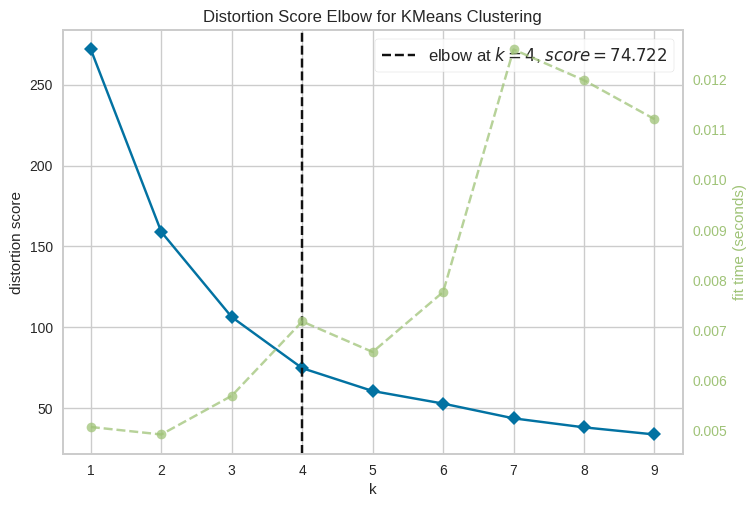

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [277]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(df_selected)

visualizer.show()

In [278]:
k = 4
model = KMeans(n_clusters=k)
model.fit(df_selected)

pred = model.predict(df_selected)

df_selected['Cluster'] = pred
score = silhouette_score(df_selected, pred)
print(f'Silhouette Score for k = {k}: {score:.3f}')

Silhouette Score for k = 4: 0.791


Silhoutte Score yang diperoleh meningkat

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

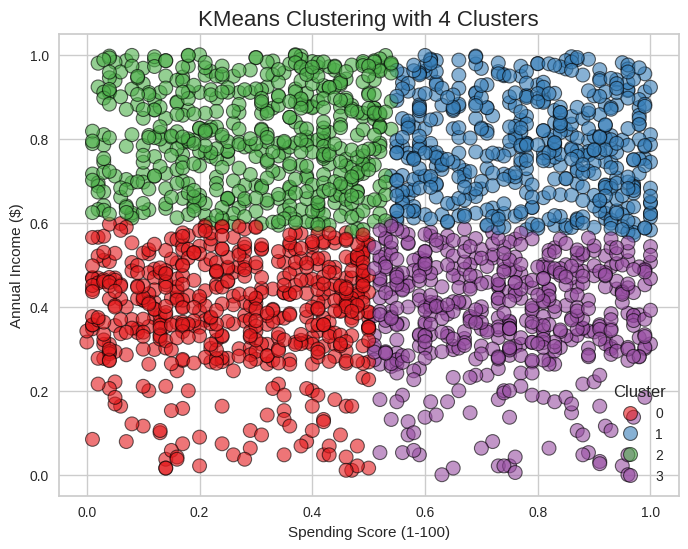

In [279]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_selected['Spending Score'], y=df_selected['Annual Income'], hue=df_selected['Cluster'], palette='Set1', s=100, alpha=0.6, edgecolor='black')

plt.title(f"KMeans Clustering with {k} Clusters", fontsize=16)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income ($)')
plt.legend(title='Cluster')

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [280]:
df_cluster = df_normalized.merge(df_selected[['Annual Income', 'Spending Score', 'Cluster']],
                        on=['Annual Income', 'Spending Score'],
                        how='left')
df_analisis = df_copy.merge(df_cluster[['CustomerID', 'Cluster']],
                        on=['CustomerID'],
                        how='left')

df_analisis.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,Cluster
0,1,1,19,15000,39,5,1,4,0
1,2,1,21,35000,81,2,3,3,3
2,3,0,20,86000,6,2,1,1,0
3,4,0,23,59000,77,7,0,2,3
4,5,0,31,38000,40,3,2,6,0


In [281]:
cluster_means = df_analisis.groupby('Cluster')[['Annual Income', 'Spending Score']].mean()
cluster_means

,Annual Income,Spending Score
Cluster,,
0,72792.916512,26.795918
1,148267.475269,77.978495
2,152187.071567,30.027079
3,71899.317526,73.929897


1. Klaster 0

- Rata-rata Annual Income: 72,792.91
- Rata-rata Spending Score: 26.79

Analisis:
Cluster ini mewakili individu dengan pendapatan tahunan yang sedang, tetapi tingkat pengeluaran mereka rendah. Ini bisa menggambarkan konsumen yang berhati-hati dalam pengeluaran atau memiliki kebutuhan dasar yang lebih rendah dibandingkan cluster lainnya.

2. Klaster 1

- Rata-rata Annual Income: 148,267.47
- Rata-rata Spending Score: 77.97

Analisis:
Cluster ini terdiri dari individu dengan pendapatan tahunan tinggi dan skor pengeluaran yang tinggi pula. Mereka kemungkinan adalah pelanggan yang cenderung menghabiskan lebih banyak, mungkin karena gaya hidup yang mewah atau karena mereka lebih terlibat dalam aktivitas konsumsi.

3. Klaster 2

- Rata-rata Annual Income: 152,187.07
- Rata-rata Spending Score: 30.02

Analisis:
Cluster ini mencakup individu dengan pendapatan tahunan sedang tetapi memiliki skor pengeluaran yang tinggi. Mereka mungkin konsumen aktif yang cenderung mengalokasikan proporsi besar dari pendapatan mereka untuk pengeluaran meskipun pendapatan mereka tidak setinggi cluster 1.

4. Klaster 3

- Rata-rata Annual Income: 71,899.31
- Rata-rata Spending Score: 73.92

Analisis:
Cluster ini terdiri dari individu dengan pendapatan tahunan yang sangat tinggi tetapi skor pengeluaran rendah. Ini bisa menunjukkan bahwa mereka lebih hemat atau mungkin mereka berfokus pada investasi atau pengelolaan kekayaan daripada pengeluaran konsumtif.

**Interpretasi**

- Cluster 1 menunjukkan pelanggan kelas premium, sementara Cluster 3 mencerminkan pelanggan kelas menengah yang aktif berbelanja.

- Cluster 0 memiliki pendapatan sedang tetapi pengeluaran rendah, mencerminkan segmen yang hemat atau fokus pada kebutuhan dasar.

- Cluster 2 memiliki pendapatan sangat tinggi tetapi skor pengeluaran rendah, yang sesuai dengan karakteristik orang kaya yang berhati-hati dalam konsumsi atau lebih fokus pada investasi.

- Cluster 1 dan 3 bisa jadi adalah pelanggan yang setia, sedangkan cluster 0 dan 2 adalah pelanggan yang hanya kebetulan lewat saja.

- Cluster 1 dan Cluster 2 cenderung mengalokasikan pendapatan untuk konsumsi aktif. Ini menunjukkan peluang untuk memasarkan produk yang sesuai dengan daya beli mereka, seperti barang mewah (Cluster 1) atau promosi harga terjangkau (Cluster 3).

- Cluster 2 merupakan segmen dengan pendapatan sangat tinggi tetapi cenderung menghemat. Pola ini dapat dimanfaatkan dengan menawarkan produk investasi, layanan keuangan, atau produk premium yang lebih praktis (misalnya, gadget atau alat investasi).

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [282]:
df_analisis.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,Cluster
0,1,1,19,15000,39,5,1,4,0
1,2,1,21,35000,81,2,3,3,3
2,3,0,20,86000,6,2,1,1,0
3,4,0,23,59000,77,7,0,2,3
4,5,0,31,38000,40,3,2,6,0


Saya akan mengubah urutan klasternya dari rata-rata penghasilan rendah ke tinggi

In [283]:
df_analisis.to_csv('Customers_Labelled.csv', index=False)